## TUGAS MINGGU 8 VISUALISASI DATA
Ridha Zalfa Salsabila
1301194100 
IF-42-GAB03

**Amazon Seller - Order Status Prediction**

Boss Leathers adalah sebuah bisnis kecil yang menjual produk bahan kulit (leather product) pada platform Amazon. Dan sekarang terdapat 40 SKU terdaftar pada Indian Marketplace. Dalam beberapa bulan terakhir, Boss Leather mengalami beberapa kerugian karena pengembalian pesanan. Disini Boss Leather mencari bantuan untuk memprediksi kemungkinan penolakan pesanan baru. Maka, akan dibuat model yang dapat memprediksi status order, apakah pesanan akan diantarkan ke pembeli atau akan dikembalikan ke seller.

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
% matplotlib inline

**Download Dataset**

In [ ]:
!gdown --id 1BxBBvumto2s-_CYlCW3Pruzjv6QmAE_6

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BxBBvumto2s-_CYlCW3Pruzjv6QmAE_6
To: /content/orders_data.xlsx
100% 26.3k/26.3k [00:00<00:00, 27.3MB/s]


In [ ]:
df = pd.read_excel('orders_data.xlsx')

In [ ]:
df.shape

(171, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_no      171 non-null    object
 1   order_date    171 non-null    object
 2   buyer         171 non-null    object
 3   ship_city     171 non-null    object
 4   ship_state    171 non-null    object
 5   sku           171 non-null    object
 6   description   171 non-null    object
 7   quantity      171 non-null    int64 
 8   item_total    153 non-null    object
 9   shipping_fee  145 non-null    object
 10  cod           47 non-null     object
 11  order_status  171 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.2+ KB


In [ ]:
df.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer


In [ ]:
# buang tanda koma pada city value

df['ship_city'] = df['ship_city'].apply(lambda x: x.replace(',', ''))

In [ ]:
df.head(3)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,CHANDIGARH,CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,PASIGHAT,ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,PASIGHAT,ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer


In [ ]:
df.isnull().sum()

order_no          0
order_date        0
buyer             0
ship_city         0
ship_state        0
sku               0
description       0
quantity          0
item_total       18
shipping_fee     26
cod             124
order_status      0
dtype: int64

**Handle Missing Value**

In [ ]:
# input mode pada missing value

df['item_total'].fillna(df['item_total'].mode()[0], inplace=True)
df['shipping_fee'].fillna(df['shipping_fee'].mode()[0], inplace=True)
df['cod'].fillna('online', inplace=True) #asumsi payment secara online jika bukan cod

In [ ]:
# hapus simbol rupee

amounts = ['item_total', 'shipping_fee']
for i in amounts:
  df[i] = df[i].apply(lambda x: x.replace(',', ''))
  df[i] = df[i].apply(lambda x: x[1:]) #hapus koma pada amounts > 1000

In [ ]:
# ubah tipe data

i = 'int64'
f = 'float64'
df = df.astype({'item_total': f, 'shipping_fee': f, 'quantity': i})

In [ ]:
df.head(5)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,CHANDIGARH,CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.0,84.96,online,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,PASIGHAT,ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,online,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,PASIGHAT,ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,60.18,online,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,DEVARAKONDA,TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,449.0,84.96,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,MUMBAI,MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.0,84.96,online,Delivered to buyer


# Business Insights

In [ ]:
# perbandingan pembayaran online dan COD terhadap status order

df[['cod', 'order_status', 'item_total']].groupby(['cod', 'order_status']).sum().reset_index()

,cod,order_status,item_total
0,Cash On Delivery,Delivered to buyer,23812.0
1,Cash On Delivery,Returned to seller,2245.0
2,online,Delivered to buyer,68508.0
3,online,Returned to seller,2694.0


In [ ]:
fig = px.histogram(df, x='cod', y='item_total', color='order_status', barmode='group', height=400)
fig.show()

dapat dilihat dari histogram di atas, lebih banyak order yang pembayarannya dibayar secara online daripada COD, dan presentase barang dikembalikan lebih banyak pada mode online

In [ ]:
# TOP 5 kota dengan angka order terbanyak

top_cities = df.groupby('ship_city').size().reset_index().rename(columns={0: 'Total'}).sort_values('Total', ascending=False).head()

In [ ]:
fig = px.pie(top_cities, values='Total', names='ship_city', color_discrete_sequence=px.colors.sequential.RdBu, title='Top 5 ordering cities')
fig.show()

Dari pie chart diatas, dapat disimpulkan bahwa kota di India yang memiliki angka order terbanyak adalah Mumbai sebesar 17 order, Bengaluru sebanyak 15 order, Kolkata sebanyak 11 order, Hyderabad sebanyak 9 order, dan New Delhi seabanyak 7 order.

In [ ]:
#TOP 5 produk yang paling banyak dibeli

top_cities = df.groupby('sku').size().reset_index().rename(columns={0: 'Total'}).sort_values('Total', ascending=False).head()
fig = px.pie(top_cities, values='Total', names='sku', color_discrete_sequence=px.colors.sequential.BuGn_r, title='Top 5 Products')
fig.show()

Dari pie chart diatas, dapat diketahui bahwa produk yang paling banyak di order adalah produk dengan kode SKU DN-0WDX-VYOT dengan total 33, dan paling sedikit adalah produk dengan SKU 2X-3C0F-KNJE dengan total 7. 

In [ ]:
# Order Status

df['order_status'].value_counts()

Delivered to buyer    160
Returned to seller     11
Name: order_status, dtype: int64

In [ ]:
df_status = df.groupby('order_status').size().reset_index().rename(columns={0: 'Total'}).sort_values('Total', ascending=False).head()
fig = px.pie(df_status, values='Total', names='order_status', color_discrete_sequence=px.colors.sequential.Plasma, title='Order Status')
fig.show()

Dari pie chart diatas, dapat diketahui perbandingan order status. Order berstatus Delivered to buyer sebanyak 160 dan order dengan status returned to seller sebanyak 11

**Apa saja kata yang paling populer pada deskripsi produk yang dikirim dan produk yang dikembalikan?**

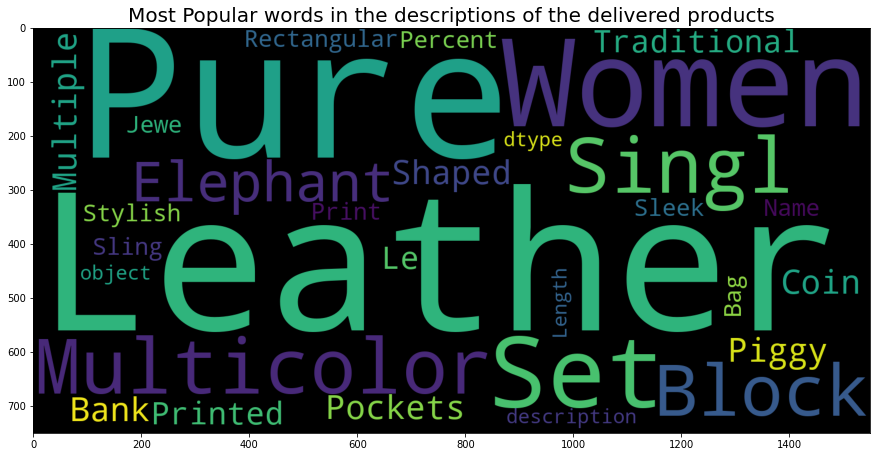

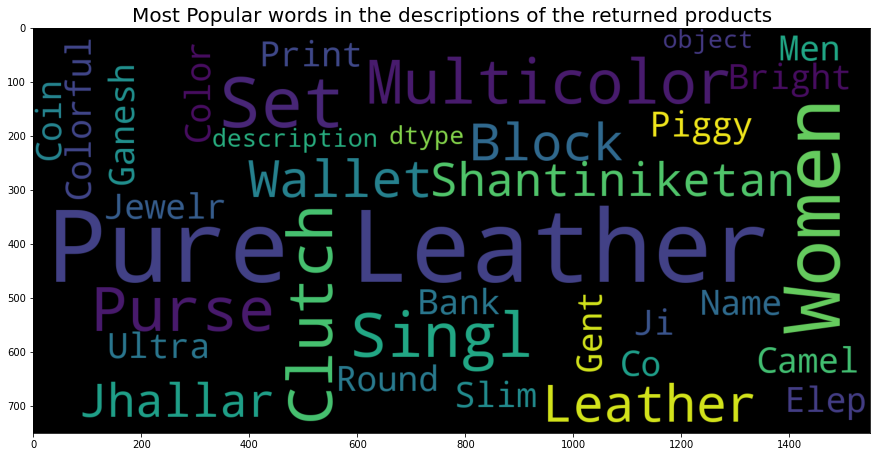

In [ ]:
plt.figure(figsize=(15,10))
wc = WordCloud(max_words=1000, width=1550, height=750, stopwords=STOPWORDS).generate(str(df[df['order_status']=='Delivered to buyer'].description))
plt.title('Most Popular words in the descriptions of the delivered products', fontsize=20)
plt.imshow(wc)
plt.figure(figsize=(15,10))
wc = WordCloud(max_words=1000, width=1550, height=750, stopwords=STOPWORDS).generate(str(df[df['order_status']=='Returned to seller'].description))
plt.title('Most Popular words in the descriptions of the returned products', fontsize=20)
plt.imshow(wc)

Dari wordcloud tersebut, dapat dilihat untuk kata-kata yang paling populer dalam deskripsi produk yang dikirim adalah Leather, Women, Pure, sementara kata-kata yang paling populer dalam deskripsi produk yang dikembalikan adalah Pure, Leather, Women, Singl 

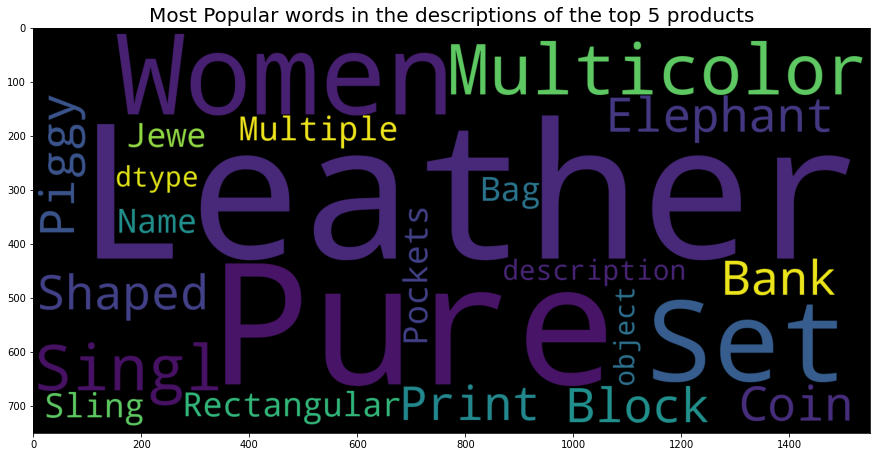

In [ ]:
plt.figure(figsize=(15,10))
wc = WordCloud(max_words=1000, width=1550, height=750, stopwords=STOPWORDS).generate(str(df.head(5).description))
plt.title('Most Popular words in the descriptions of the top 5 products', fontsize=20)
plt.imshow(wc)

Dari wordcloud di atas, dapat diketahui kata-kata yang paling populer pada deskripsi top 5 product adalah Leather, Pure, Set, Women, Multicolor, dan lainnya.